In [8]:
# Imports
import pandas as pd
import matplotlib.pyplot as plt
import os

In [9]:
# Load and look at the data

df = pd.read_csv("../data/processed/sunshine.csv")
df.head()

,game,point,tournament,opponent,timestamp,score,gendermatch,starting,force,opp_force,...,num_throws_pbr,num_breaks_pbr,num_turns,num_blocks,scoring_team,goal,assist,hockey_assist,score_notes,notes
0,g001,p001,rr1,sunshine,3:11,1-0,f2,o,NaN,flick,...,15.0,0.0,4,0.0,pbr,NaN,NaN,NaN,NaN,NaN
1,g001,p002,rr1,sunshine,5:19,2-0,c1,d,flick,NaN,...,6.0,1.0,1,1.0,pbr,Sawyer,Monica,Visakha,worked to breakside and scored on an away shot,point started before timestamp; missing film
2,g001,p003,rr1,sunshine,6:16,3-0,c2,d,flick,NaN,...,2.0,0.0,1,1.0,pbr,Lincoln,Monica,Tristan,slashing breakside under into huck,short pull? Play starts at half field
3,g001,p004,rr1,sunshine,NaN,4-0,f1,d,NaN,NaN,...,NaN,NaN,1,NaN,pbr,Margo,Yeagle,NaN,NaN,Point is missing in film
4,g001,p005,rr1,sunshine,NaN,5-0,f2,d,NaN,NaN,...,NaN,NaN,1,NaN,pbr,Saul,Monica,NaN,NaN,Point is missing in film


In [10]:
df.info()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24 entries, 0 to 23
Data columns (total 25 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   game            24 non-null     object 
 1   point           24 non-null     object 
 2   tournament      24 non-null     object 
 3   opponent        24 non-null     object 
 4   timestamp       22 non-null     object 
 5   score           24 non-null     object 
 6   gendermatch     24 non-null     object 
 7   starting        24 non-null     object 
 8   force           12 non-null     object 
 9   opp_force       10 non-null     object 
 10  offense_set     8 non-null      object 
 11  defense_set     12 non-null     object 
 12  players         24 non-null     object 
 13  num_throws_opp  22 non-null     float64
 14  num_breaks_opp  22 non-null     float64
 15  num_throws_pbr  22 non-null     float64
 16  num_breaks_pbr  22 non-null     float64
 17  num_turns       24 non-null     int64

game               0
point              0
tournament         0
opponent           0
timestamp          2
score              0
gendermatch        0
starting           0
force             12
opp_force         14
offense_set       16
defense_set       12
players            0
num_throws_opp     2
num_breaks_opp     2
num_throws_pbr     2
num_breaks_pbr     2
num_turns          0
num_blocks         2
scoring_team       0
goal              10
assist            10
hockey_assist     13
score_notes        4
notes             16
dtype: int64

In [11]:
df.describe(include="all")

,game,point,tournament,opponent,timestamp,score,gendermatch,starting,force,opp_force,...,num_throws_pbr,num_breaks_pbr,num_turns,num_blocks,scoring_team,goal,assist,hockey_assist,score_notes,notes
count,24,24,24,24,22,24,24,24,12,10,...,22.000000,22.000000,24.000000,22.000000,24,14,14,11,20,8
unique,1,24,1,1,22,24,4,2,2,2,...,NaN,NaN,NaN,NaN,2,13,12,10,20,6
top,g001,p001,rr1,sunshine,3:11,1-0,f2,d,flick,flick,...,NaN,NaN,NaN,NaN,pbr,Margo,Monica,Emmet,worked to breakside and scored on an away shot,point started before timestamp; missing film
freq,24,1,24,24,1,1,6,14,11,7,...,NaN,NaN,NaN,NaN,15,2,3,2,1,2
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,6.363636,1.681818,1.500000,0.363636,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,5.525227,2.009178,1.587998,0.581087,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.250000,0.000000,0.750000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,6.000000,1.000000,1.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,9.750000,3.000000,2.000000,1.000000,NaN,NaN,NaN,NaN,NaN,NaN


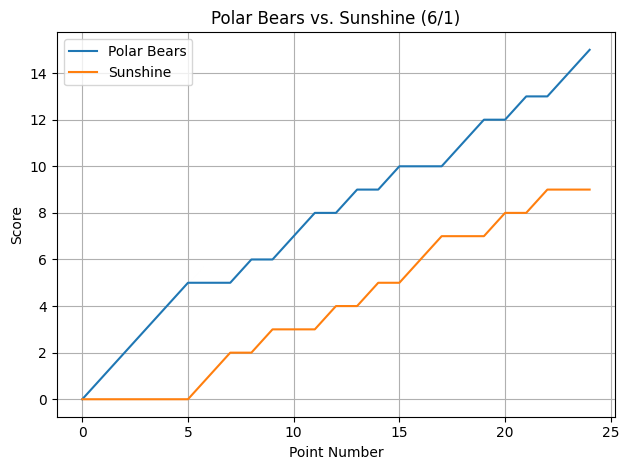

In [14]:
# Visualize how the game went

scoring_column = "ScoringTeam"

pbr_score = 0
sunshine_score = 0
pbr_scores = []
sunshine_scores = []

for scorer in df['scoring_team']:
    if scorer == 'pbr':
        pbr_score += 1
    else:
        sunshine_score += 1
    pbr_scores.append(pbr_score)
    sunshine_scores.append(sunshine_score)

pbr_scores = [0] + pbr_scores
sunshine_scores = [0] + sunshine_scores
points = list(range(len(pbr_scores)))

# Plotting
plt.plot(points, pbr_scores, label="Polar Bears")
plt.plot(points, sunshine_scores, label="Sunshine")
plt.xlabel("Point Number")
plt.ylabel("Score")
plt.title("Polar Bears vs. Sunshine (6/1)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


PBR total throws: 140.0, break throws: 37.0
Sunshine total throws: 125.0, break throws: 33.0


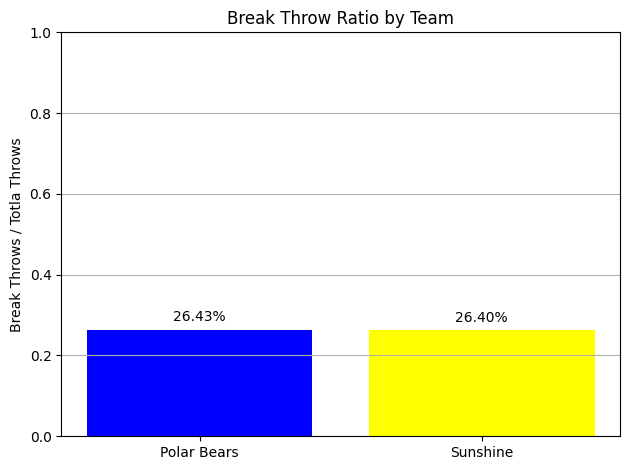

In [18]:
# Calculating break throws ratios

total_throws_pbr = df["num_throws_pbr"].sum()
break_throws_pbr = df["num_breaks_pbr"].sum()

total_throws_opp = df["num_throws_opp"].sum()
break_throws_opp = df["num_breaks_opp"].sum()

print(f"PBR total throws: {total_throws_pbr}, break throws: {break_throws_pbr}")
print(f"Sunshine total throws: {total_throws_opp}, break throws: {break_throws_opp}")

ratio_pbr = break_throws_pbr/total_throws_pbr if total_throws_pbr > 0 else 0
ratio_opp = break_throws_opp/total_throws_opp if total_throws_opp > 0 else 0

teams = ["Polar Bears", "Sunshine"]
ratios = [ratio_pbr, ratio_opp]

plt.bar(["Polar Bears", "Sunshine"], [ratio_pbr, ratio_opp], color=["blue", "yellow"])
plt.title("Break Throw Ratio by Team")
plt.ylabel("Break Throws / Totla Throws")
plt.ylim(0,1)
plt.grid(axis="y")
plt.tight_layout()

for i, val in enumerate(ratios):
    plt.text(i, val + 0.02, f"{val:.2%}", ha='center')

plt.show()

In [19]:
from collections import defaultdict

# Start with an empty dict for players
player_scores = defaultdict(int)

for _, row in df.iterrows():
    goal = row.get("goal")
    assist1 = row.get("assist")
    assist2 = row.get("hockey_assist")

    if pd.notna(goal):
        player_scores[goal] += 2
    if pd.notna(assist1):
        player_scores[assist1] += 1
    if pd.notna(assist2):
        player_scores[assist2] += 1

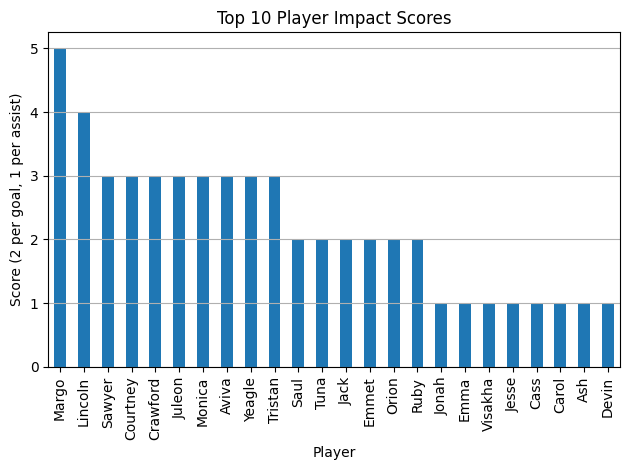

In [23]:
# Convert to sorted Series
sorted_scores = pd.Series(player_scores).sort_values(ascending=False)

# Plot Top 10
sorted_scores.plot(kind="bar")
plt.title("Top 10 Player Impact Scores")
plt.ylabel("Score (2 per goal, 1 per assist)")
plt.xlabel("Player")
plt.grid(axis='y')
plt.tight_layout()
plt.show()